# Package Installation

In [1]:
!pip install tslearn

/bin/bash: /opt/conda/lib/libtinfo.so.6: no version information available (required by /bin/bash)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 358.2/358.2 kB 1.2 MB/s eta 0:00:00a 0:00:01


In [2]:
import numpy as np
import pandas as pd
from scipy import stats
import requests
import json
from tslearn.clustering import TimeSeriesKMeans
from pandas.io.json import json_normalize
from datetime import datetime
from sklearn.impute import KNNImputer
import seaborn as sns
import matplotlib.pyplot as plt
import plotly
import plotly.tools as tls
import plotly.io as pio

import warnings
warnings.filterwarnings('ignore')


In [3]:
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)
# pd.set_option('display.width', None)
# pd.set_option('display.max_colwidth', None)
pd.options.plotting.backend = "plotly"
pio.templates.default = 'plotly_white'

# Data Import

In [4]:
final_df = pd.read_csv('/kaggle/input/iot-project-clean-data/cleaned_data.csv')
final_df_log = pd.read_csv('/kaggle/input/iot-project-clean-data/cleaned_log_data.csv')

In [5]:
values = ["CO","CO2","NH4", "Toluene", "Alcohol", "Humidity", "Noise", "Temperature"]
final_df['created_at']=pd.to_datetime(final_df['created_at'])
final_df[values]= final_df[values].astype('float')

final_df_log['created_at']=pd.to_datetime(final_df_log['created_at'])
final_df_log[values]= final_df_log[values].astype('float')

# Clustering

In [6]:
values_df = final_df[values]

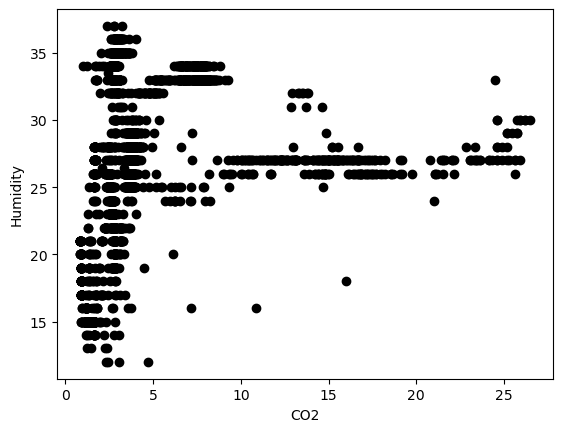

In [7]:
x = values_df[["CO2", "Humidity"]]

#visualization of Scatterplot
plt.scatter(x["CO2"], x["Humidity"], c='black')
plt.xlabel('CO2')
plt.ylabel('Humidity')
plt.show()

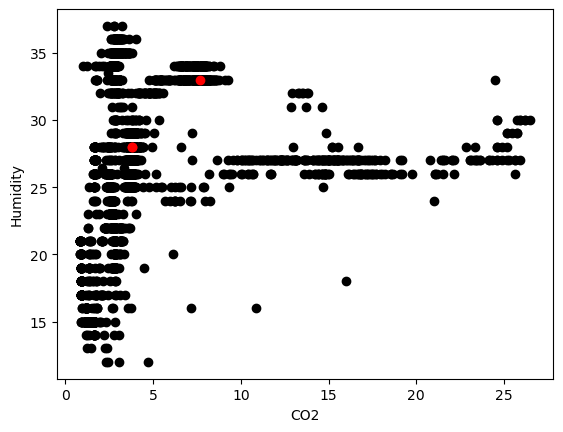

In [8]:
K=3
Centroids = (x.sample(n=K))
plt.scatter(x["CO2"], x["Humidity"], c='black')
plt.scatter(Centroids["CO2"], Centroids["Humidity"], c='red')
plt.xlabel('CO2')
plt.ylabel('Humidity')
plt.show()

In [9]:
diff=1
j=0
while(diff!=0):
    xD=x
    i=1
    for index1, row_c in Centroids.iterrows():
        ED=[]
        for index2, row_d in xD.iterrows():
            d1=(row_c["CO2"]-row_d["CO2"])**2
            d2=(row_c["Humidity"]-row_d["Humidity"])**2
            d = np.sqrt(d1+d2)
            ED.append(d)
        x[i]=ED
        i=i+1
        
    c=[]
    for index,row in x.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        c.append(pos)
    x["Cluster"] = c
    Centroids_new = x.groupby(["Cluster"]).mean()[["CO2", "Humidity"]]
    if j==0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['CO2'] - Centroids['CO2']).sum() + (Centroids_new['Humidity'] - Centroids['Humidity']).sum()
        print(diff.sum())
    Centroids = x.groupby(["Cluster"]).mean()[["CO2", "Humidity"]]

-3.711522094620188
-1.8653966768929813
-0.6684853057150781
-1.223884083002711
-0.2469542048890696
-0.008896283938137461
0.0


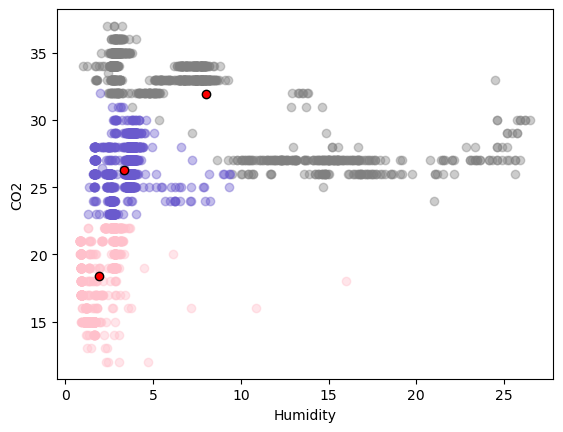

<Figure size 1200x900 with 0 Axes>

In [10]:
color=['grey', 'slateblue', 'pink']
for k in range(K):
    data = x[x["Cluster"]==k+1]
    plt.scatter(data["CO2"], data["Humidity"], c=color[k], alpha=.4)
plt.scatter(Centroids["CO2"], Centroids["Humidity"], c='red', edgecolors='black', linewidth=1)
plt.xlabel('Humidity')
plt.ylabel('CO2')
plt.figure(figsize=(12,9))
plt.show()

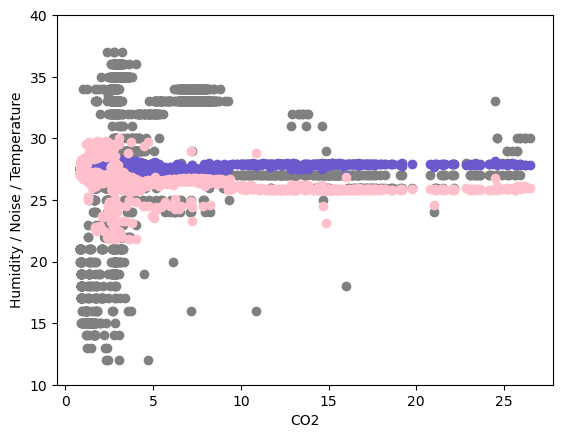

In [11]:
x = final_df[["CO2", "Humidity", "Noise" , "Temperature" ]]

#visualization of Scatterplot
plt.scatter(x["CO2"], x["Humidity"], c='grey')
plt.scatter(x["CO2"], x["Noise"], c='slateblue')
plt.scatter(x["CO2"], x["Temperature"], c='pink')
plt.xlabel('CO2')
plt.ylim(10,40)
plt.ylabel('Humidity / Noise / Temperature')
plt.show()

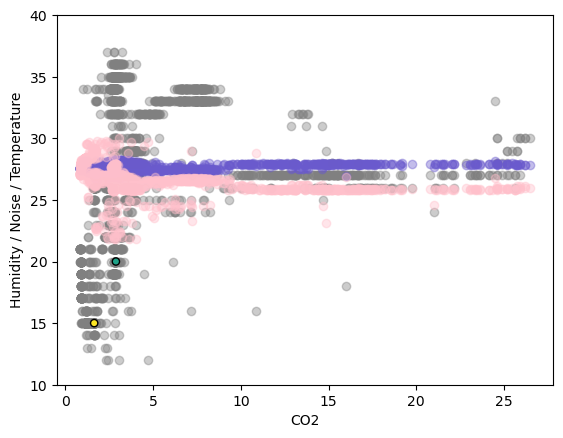

In [12]:
K=3
Centroids = (x.sample(n=K))
plt.scatter(x["CO2"], x["Humidity"], c='grey',alpha=.4)
plt.scatter(x["CO2"], x["Noise"], c='slateblue',alpha=.4)
plt.scatter(x["CO2"], x["Temperature"], c='pink',alpha=.4)
plt.scatter(Centroids["CO2"], Centroids["Humidity"], Centroids["Noise"], Centroids["Temperature"], edgecolors='black', linewidth=1)
plt.xlabel('CO2')
plt.ylim(10,40)
plt.ylabel('Humidity / Noise / Temperature')
plt.show()

In [13]:
diff=1
j=0
while(diff!=0):
    xD=x
    i=1
    for index1, row_c in Centroids.iterrows():
        ED=[]
        for index2, row_d in xD.iterrows():
            d1=(row_c["CO2"]-row_d["CO2"])**2
            d2=(row_c["Noise"]-row_d["Noise"])**2
            d3=(row_c["Humidity"]-row_d["Humidity"])**2
            d4=(row_c["Temperature"]-row_d["Temperature"])**2
            d = np.sqrt(d1+d2+d3+d4)
            
            ED.append(d)
        x[i]=ED
        i=i+1
      
    c=[]
    for index,row in x.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        c.append(pos)
    x["Cluster"] = c
    Centroids_new = x.groupby(["Cluster"]).mean()[["CO2", "Noise","Humidity","Temperature"]]
    if j==0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['CO2'] - Centroids['CO2']).sum() + (Centroids_new['Noise'] - Centroids['Noise']).sum() + (Centroids_new['Humidity'] - Centroids['Humidity']).sum() + (Centroids_new['Temperature'] - Centroids['Temperature']).sum()
        print(diff.sum())
    Centroids = x.groupby(["Cluster"]).mean()[["CO2", "Noise","Humidity","Temperature"]]

3.1964600368772778
2.338412807146285
0.7573164701692803
0.08971053301643606
0.008693474607894824
0.008680158031409757
0.0


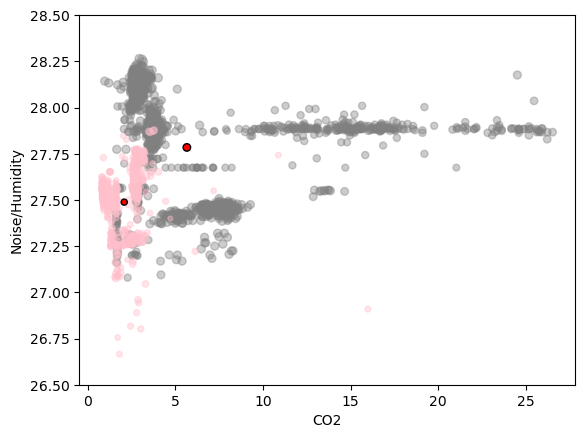

<Figure size 1500x1000 with 0 Axes>

In [14]:
color=['grey', 'slateblue', 'pink']
for k in range(K):
    data = x[x["Cluster"]==k+1]
    plt.scatter(data["CO2"], data["Noise"], data['Humidity'], c=color[k], alpha=.4)
plt.scatter(Centroids["CO2"], Centroids["Noise"], Centroids["Humidity"], c='red', edgecolors='black', linewidth=1)
plt.xlabel('CO2')
plt.ylabel('Noise/Humidity')
plt.ylim(26.5,28.5)
plt.figure(figsize=(15,10))
plt.show()

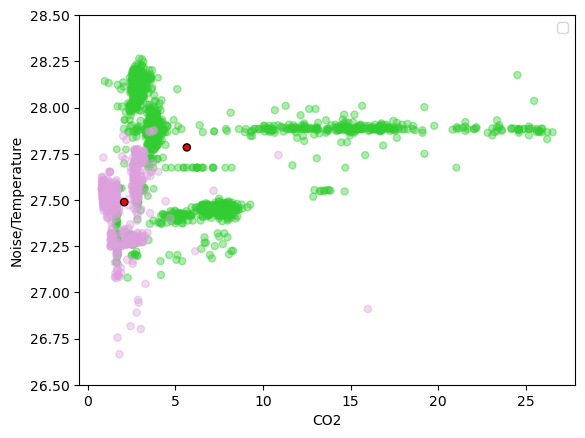

<Figure size 1500x1000 with 0 Axes>

In [15]:
color=['limegreen', 'bisque', 'plum']
for k in range(K):
    data = x[x["Cluster"]==k+1]
    plt.scatter(data["CO2"], data["Noise"], data['Temperature'], c=color[k], alpha=.4)
plt.scatter(Centroids["CO2"], Centroids["Noise"], Centroids["Temperature"], c='red', edgecolors='black', linewidth=1)
plt.xlabel('CO2')
plt.ylabel('Noise/Temperature')
plt.ylim(26.5,28.5)
plt.legend()
plt.figure(figsize=(15,10))
plt.show()

# Time Series Clustering

In [17]:
def plot_hourly_timeseries(df, variable):
    df['Date-Hour'] = df.created_at.apply(lambda x:str(x.day)+'-'+str(x.hour))
    df['Minute-Second'] = df.created_at.apply(lambda x:str(x.minute)+'-'+str(x.second))
    df_pivot = pd.pivot_table(df, index=df['Minute-Second'], columns=df['Date-Hour'], values=variable)
    df_pivot = df_pivot.reset_index().rename_axis(None, axis=1)
    df_pivot['Minute'] = df['Minute-Second'].apply(lambda x:int(str(x).split("-")[0]))
    df_pivot = df_pivot.groupby('Minute').mean().reset_index().sort_values(by=['Minute']).fillna(method='ffill',axis=0).fillna(method='bfill',axis=0)
    return df_pivot

def plot_clustered_timeseries(df, variable):
    x_train = np.array(df.iloc[:,1:].T.values.tolist())
    model = TimeSeriesKMeans(n_clusters=2, metric="dtw", max_iter=10)
    history = model.fit_predict(x_train)
    for yi in range(2):
        for xx in x_train[history == yi]:
            plt.plot(xx.ravel(), "k-", alpha=.2)
        plt.plot(model.cluster_centers_[yi].ravel(), "r-")
        plt.xlabel("Minutes in Hours")
        plt.ylabel(variable)
    return plt

In [18]:
df_CO2_pivot = plot_hourly_timeseries(final_df[['created_at','CO2']], 'CO2')
fig_CO2 = df_CO2_pivot.plot(x=df_CO2_pivot['Minute'], y=list(df_CO2_pivot)[1:])
plotly.offline.plot(fig_CO2, filename='CO2_Hourly_timeseries.html')
fig_CO2

In [19]:
plt = plot_clustered_timeseries(df_CO2_pivot, 'CO2')  
fig_CO2_Cluster = tls.mpl_to_plotly(plt.gcf())
plotly.offline.plot(fig_CO2_Cluster, filename='CO2_Clustered_timeseries.html')
fig_CO2_Cluster

In [20]:
df_CO2_log_pivot = plot_hourly_timeseries(final_df_log[['created_at','CO2']], 'CO2')
fig_CO2_log=df_CO2_log_pivot.plot(x=df_CO2_log_pivot['Minute'], y=list(df_CO2_log_pivot)[1:])
plotly.offline.plot(fig_CO2_log, filename='CO2_Hourly_log_timeseries.html')
fig_CO2_log

In [21]:
plt = plot_clustered_timeseries(df_CO2_log_pivot, 'CO2')  
fig_CO2_log_cluster = tls.mpl_to_plotly(plt.gcf())
plotly.offline.plot(fig_CO2_log_cluster, filename='CO2_Clustered_log_timeseries.html')
fig_CO2_log_cluster

In [22]:
df_temp_pivot = plot_hourly_timeseries(final_df[['created_at','Temperature']], 'Temperature')
fig_temp=df_temp_pivot.plot(x=df_temp_pivot['Minute'], y=list(df_temp_pivot)[1:])
plotly.offline.plot(fig_temp, filename='Temp_Hourly_timeseries.html')
fig_temp

In [23]:
plt = plot_clustered_timeseries(df_temp_pivot, 'Temperature')  
fig_temp_cluster = tls.mpl_to_plotly(plt.gcf())
plotly.offline.plot(fig_temp_cluster, filename='Temp_Clustered_timeseries.html')
fig_temp_cluster

In [24]:
df_temp_log_pivot = plot_hourly_timeseries(final_df_log[['created_at','Temperature']], 'Temperature')
fig_temp_log=df_temp_log_pivot.plot(x=df_temp_log_pivot['Minute'], y=list(df_temp_log_pivot)[1:])
plotly.offline.plot(fig_temp_log, filename='Temp_Hourly_log_timeseries.html')
fig_temp_log

In [25]:
plt = plot_clustered_timeseries(df_temp_log_pivot, 'Temperature')  
fig_temp_log_cluster = tls.mpl_to_plotly(plt.gcf())
plotly.offline.plot(fig_temp_log_cluster, filename='Temp_Clustered_log_timeseries.html')
fig_temp_log_cluster

In [26]:
df_hum_log_pivot = plot_hourly_timeseries(final_df_log[['created_at','Humidity']], 'Humidity')
fig_hum_log=df_hum_log_pivot.plot(x=df_hum_log_pivot['Minute'], y=list(df_hum_log_pivot)[1:])
plotly.offline.plot(fig_hum_log, filename='Humidity_Hourly_log_timeseries.html')
fig_hum_log

In [27]:
plt = plot_clustered_timeseries(df_hum_log_pivot, 'Humidity')  
fig_hum_log_cluster = tls.mpl_to_plotly(plt.gcf())
plotly.offline.plot(fig_hum_log_cluster, filename='Humidity_Clustered_log_timeseries.html')
fig_hum_log_cluster

In [28]:
df_noise_log_pivot = plot_hourly_timeseries(final_df_log[['created_at','Noise']], 'Noise')
fig_noise_log=df_noise_log_pivot.plot(x=df_noise_log_pivot['Minute'], y=list(df_noise_log_pivot)[1:])
plotly.offline.plot(fig_noise_log, filename='Noise_Hourly_log_timeseries.html')
fig_noise_log

In [29]:
plt = plot_clustered_timeseries(df_noise_log_pivot, 'Noise')  
fig_noise_log_cluster = tls.mpl_to_plotly(plt.gcf())
plotly.offline.plot(fig_noise_log_cluster, filename='Noise_Clustered_log_timeseries.html')
fig_noise_log_cluster